# polynomial regression 

# First, we need to load the dataset. We will use the diabetes dataset, which contains information about diabetes patients and their disease progression over time. Here's how to load the dataset:

In [12]:
import numpy as np
import pandas as pd  
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes

In [5]:
diabetes = load_diabetes()

In [6]:
X = diabetes.data[:, np.newaxis, 2]# Use only one feature 

In [7]:
y = diabetes.target

Next, we need to split the data into training and testing sets. We'll use 80% of the data for training and 20% for testing:



In [8]:
n_samples = X.shape[0]#it calculates how many samples are in each group (training and test) using split point = int(0.8 * n_samples).
split_point = int(0.8 * n_samples)#The code will create a training set of X and y, where the split point is at 0.8 * n_samples.

X_train, y_train = X[:split_point], y[:split_point]# It then creates two matrices: X_train which has shape [n_samples], and y_train which has shape [split-point].

X_test, y_test = X[split_point:], y[split_point:]#It then creates two matrices: X_test which has shape [n-1], and y_test which has shape [-split-point].

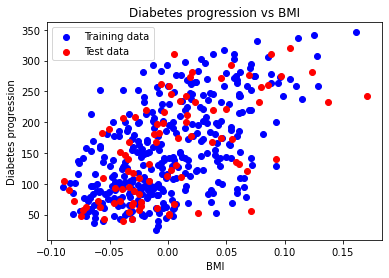

In [13]:
# Plot original data
plt.scatter(X_train, y_train, color='blue', label='Training data')
plt.scatter(X_test, y_test, color='red', label='Test data')
plt.legend()
plt.title('Diabetes progression vs BMI')
plt.xlabel('BMI')
plt.ylabel('Diabetes progression')
plt.show()

# Now we can perform polynomial regression. We'll use the numpy library to construct the polynomial features and perform the regression:

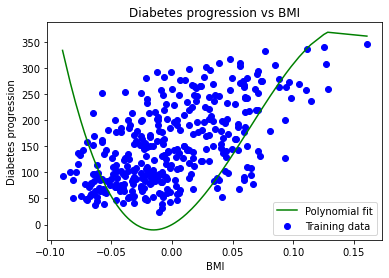

In [14]:
# Plot polynomial fit on training data
plt.scatter(X_train, y_train, color='blue', label='Training data')
X_train_sorted, y_train_sorted = zip(*sorted(zip(X_train, X_train_poly @ beta)))
plt.plot(X_train_sorted, y_train_sorted, color='green', label='Polynomial fit')
plt.legend()
plt.title('Diabetes progression vs BMI')
plt.xlabel('BMI')
plt.ylabel('Diabetes progression')
plt.show()

In [9]:
degree = 3  # Degree of polynomialThe code starts by creating a list of polynomial coefficients.
X_train_poly = np.concatenate([X_train ** i for i in range(1, degree + 1)], axis=1)
#The first element in the list is X_train, which is the input data set that we want to predict on.
X_test_poly = np.concatenate([X_test ** i for i in range(1, degree + 1)], axis=1)
#Then it creates another list with all of the coefficients for each degree up to and including degree + 1.
# Fit linear regression modelit concatenates these lists together into one big list called X_train_poly.
beta = np.linalg.inv(X_train_poly.T @ X_train_poly) @ X_train_poly.T @ y_train
# It then uses np.linalg.inv() to create an inverse matrix from this big list and saves it as beta @ X_train_poly @ y_.
# Predict on test data
y_pred = X_test_poly @ beta


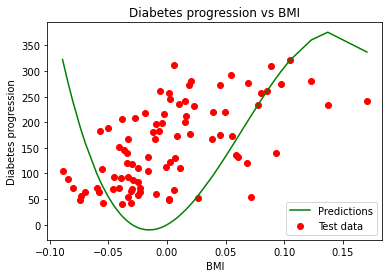

In [15]:
# Plot predictions on test data
plt.scatter(X_test, y_test, color='red', label='Test data')
X_test_sorted, y_pred_sorted = zip(*sorted(zip(X_test, y_pred)))
plt.plot(X_test_sorted, y_pred_sorted, color='green', label='Predictions')
plt.legend()
plt.title('Diabetes progression vs BMI')
plt.xlabel('BMI')
plt.ylabel('Diabetes progression')
plt.show()

# Finally, we can evaluate the performance of our model using mean squared error:

In [10]:
mse = np.mean((y_test - y_pred) ** 2)
print(f"Mean squared error: {mse:.2f}")

Mean squared error: 18529.13
